In [93]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [94]:
# Step 2: Load the Dataset
df = pd.read_excel("glass.xlsx", sheet_name="glass")

In [95]:
df.shape
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [96]:
# Step 3: Check for Missing Values and Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [97]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [98]:
# There are no missing values in the dataset.

In [99]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


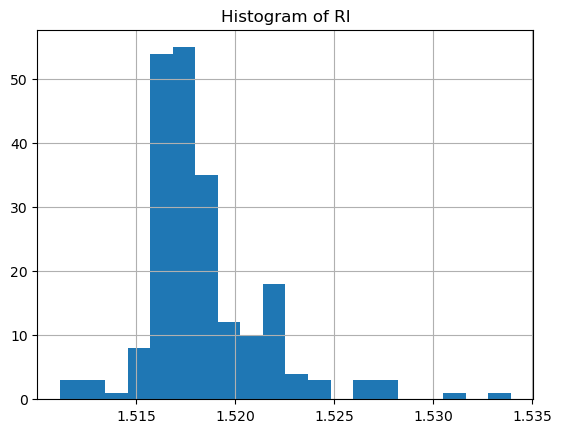

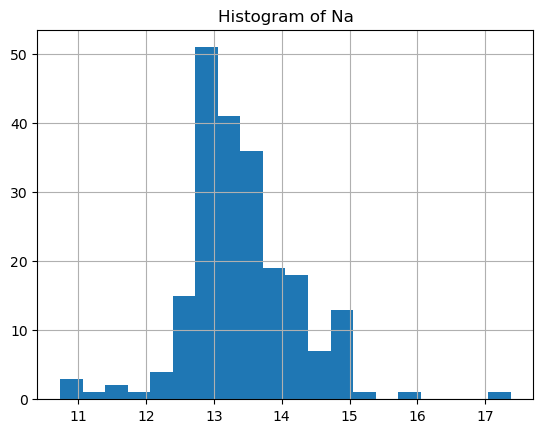

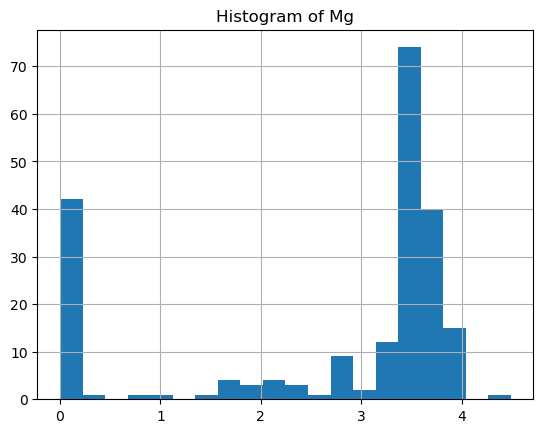

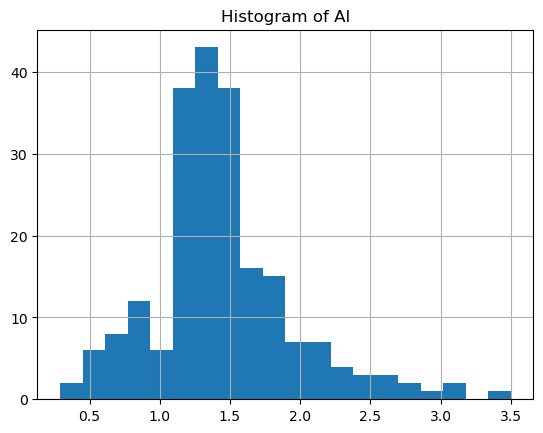

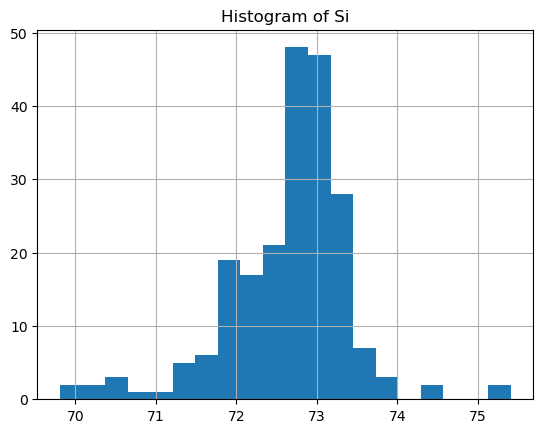

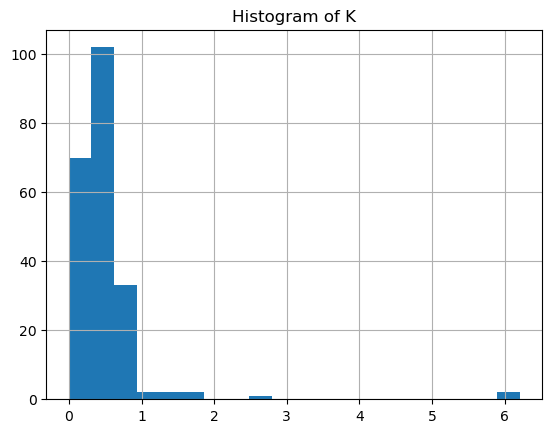

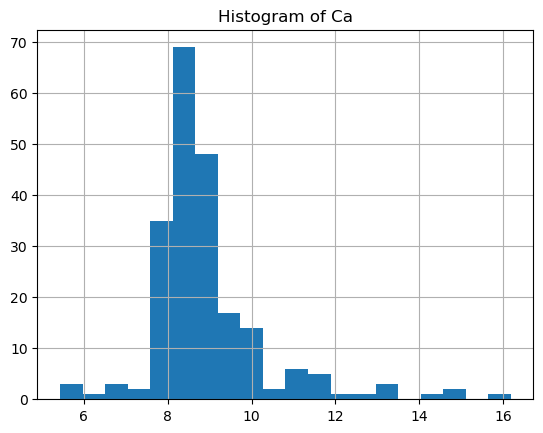

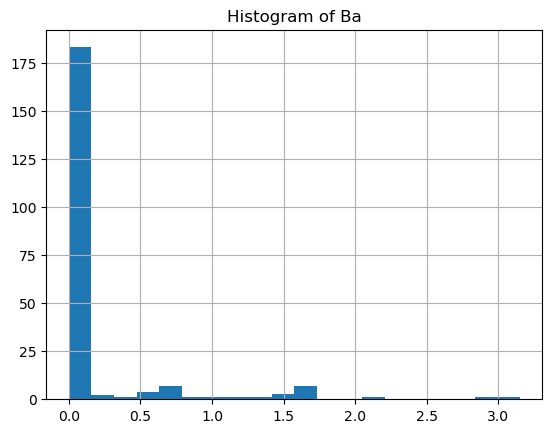

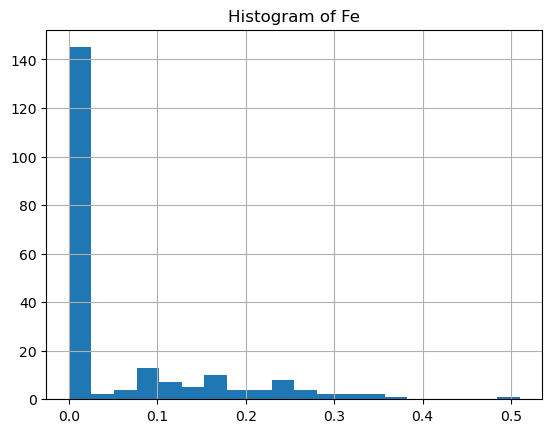

In [100]:
#  Step 4: Visualizations 
numeric_cols = [c for c in df.columns if c != "Type"]
# Histograms
for col in numeric_cols:
    df[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()

In [101]:
# Many features show skewed distributions.

# Features such as Ba, Fe, and K are highly skewed, with many values concentrated at 0.

# Features like RI, Na, Mg, Ca are more normally distributed.

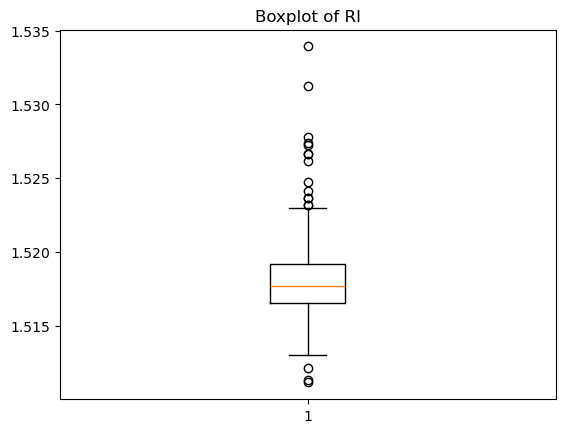

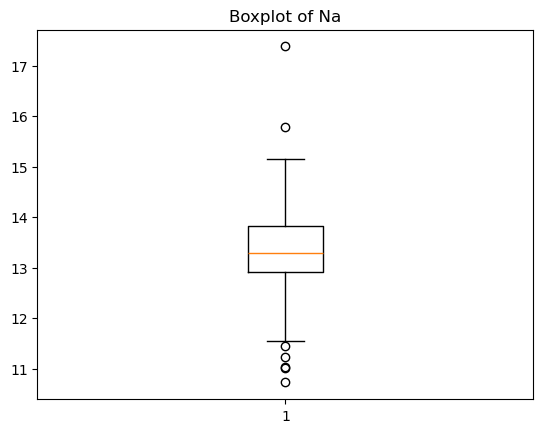

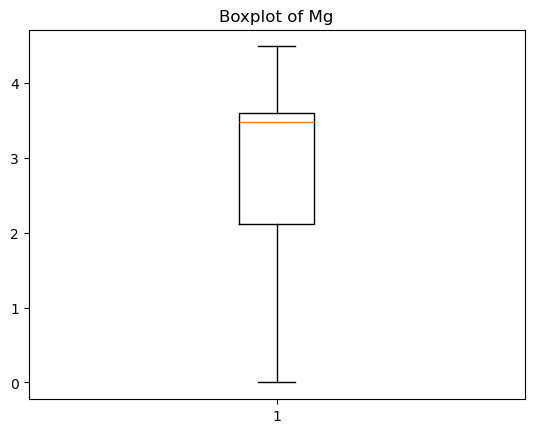

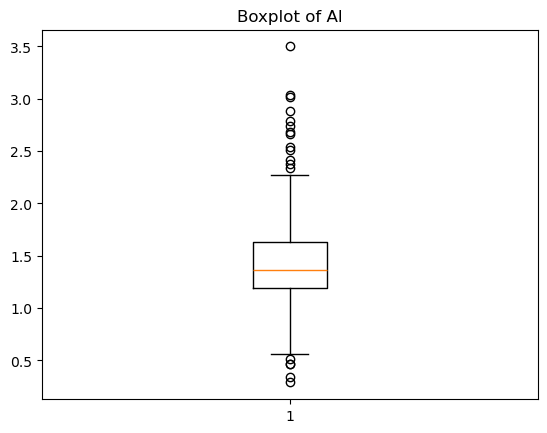

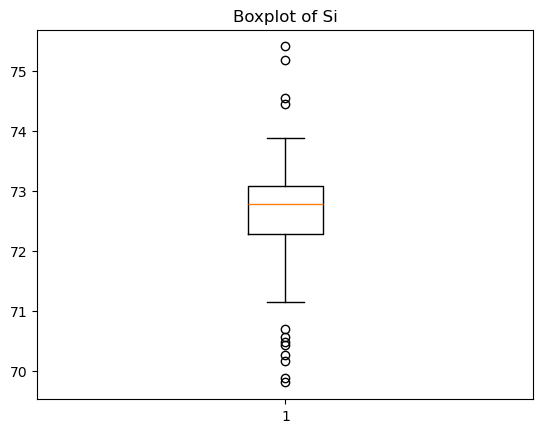

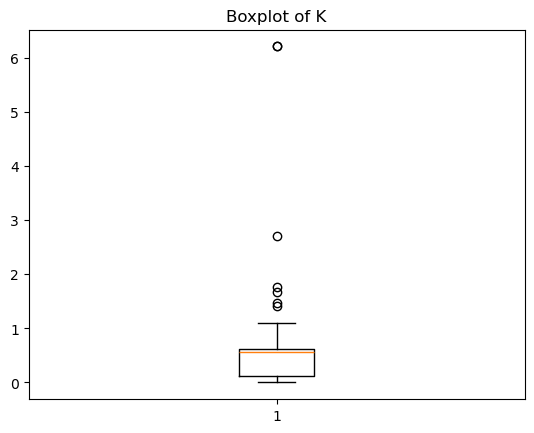

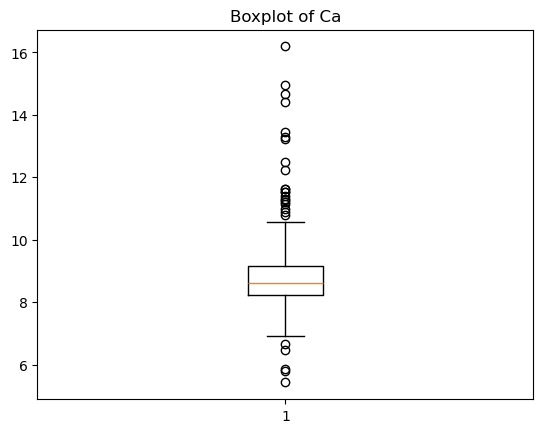

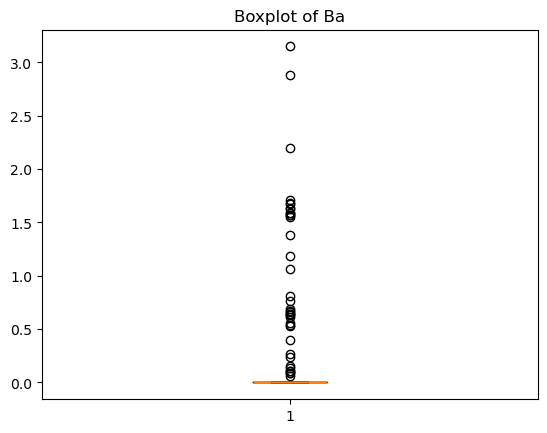

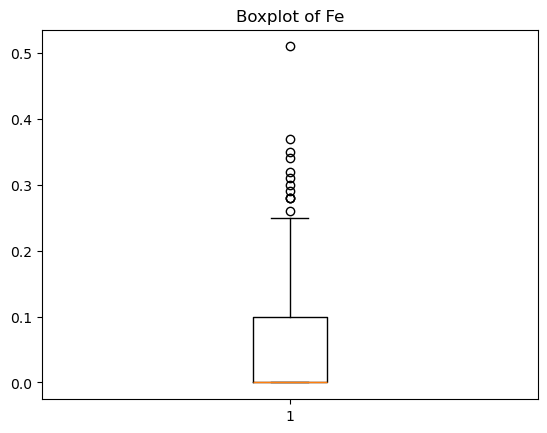

In [102]:
# Boxplots
for col in numeric_cols:
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [103]:
# Outliers are present in several features.

# Ba (38), Ca (26), and Al (18) have the most outliers.

# Outliers are expected because of different glass types with varying compositions.

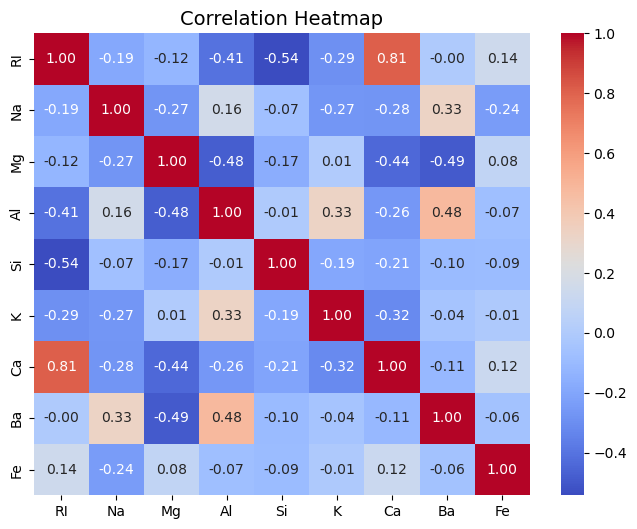

In [104]:
#  Step 5: Correlation Heatmap (Seaborn Easy Version)
import seaborn as sns

# Calculate correlations
corr = df[numeric_cols].corr()

# Plot heatmap with annotations
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [105]:
# RI and Ca are highly correlated (~0.81).

# RI and Si also have moderate correlation (~0.54).

# Mg and Ba show weak positive correlation (~0.49).

# Some features are nearly independent (e.g., Fe).

In [106]:
#  Step 6: Train-Test Split + Scaling
X = df.drop(columns=["Type"])
y = df["Type"]

In [107]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [108]:
# Scale features (optional but included)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# All features are numeric, so no encoding was required.
# Features were scaled using StandardScaler.

In [110]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (171, 9)
Test size: (43, 9)


In [111]:
# Step 7: Baseline Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [112]:
y_pred = rf.predict(X_test)

In [113]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43


Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [114]:
# Accuracy: 83.7%.
# Random Forest performs very well on this dataset.
# Strong balance between precision and recall for most classes.

In [115]:
# Step 8: Random Forest with class_weight='balanced'
rf_bal = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf_bal.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [116]:
y_pred_bal = rf_bal.predict(X_test)

In [117]:
print("Balanced RF Accuracy:", accuracy_score(y_test, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))

Balanced RF Accuracy: 0.813953488372093

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.84        43
weighted avg       0.83      0.81      0.81        43



In [118]:
# Accuracy: 81.4%, slightly lower than baseline.
# Using class_weight='balanced' did not improve overall accuracy.
# It gave more importance to minority classes, but slightly reduced performance on majority classes.

In [119]:
#  Step 9: Bagging (Decision Trees)
# For scikit-learn >= 1.2 use 'estimator' instead of 'base_estimator'
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42)

bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=42)

In [120]:
y_pred_bag = bag.predict(X_test)

In [121]:
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))

Bagging Accuracy: 0.7674418604651163

Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.77      0.67      0.71        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.77        43
   macro avg       0.78      0.80      0.78        43
weighted avg       0.77      0.77      0.76        43


Confusion Matrix:
 [[11  2  0  0  0  1]
 [ 3 10  0  1  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [122]:
# Accuracy: 76.7%.
# Bagging is weaker compared to Random Forest.
# Confirms that Random Forest > Bagging, since Random Forest uses feature randomness + averaging, making it stronger.

In [123]:
# Step 10: Boosting (AdaBoost & GradientBoosting)

# AdaBoost
ada = AdaBoostClassifier(n_estimators=200, random_state=42)
ada.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=200, random_state=42)

In [124]:
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.5348837209302325


In [125]:
# Accuracy: 53.5%, which is very low compared to Random Forest.
# AdaBoost struggles here, likely because the dataset is small and imbalanced.
# Boosting tends to overfit on minority classes in such datasets.

In [126]:
# GradientBoosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [127]:
y_pred_gb = gb.predict(X_test)
print("GradientBoosting Accuracy:", accuracy_score(y_test, y_pred_gb))

GradientBoosting Accuracy: 0.8372093023255814


In [128]:
# Accuracy: 83.7%, same as baseline Random Forest.
# Shows Gradient Boosting can perform competitively with Random Forest.
# However, Gradient Boosting may take longer to train compared to Random Forest.

In [129]:
# Step 11: Compare Models
results = {
    "RandomForest": accuracy_score(y_test, y_pred),
    "RandomForest (Balanced)": accuracy_score(y_test, y_pred_bal),
    "Bagging": accuracy_score(y_test, y_pred_bag),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "GradientBoosting": accuracy_score(y_test, y_pred_gb),
}

print("Model Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.3f}")

Model Comparison:
RandomForest: 0.837
RandomForest (Balanced): 0.814
Bagging: 0.767
AdaBoost: 0.535
GradientBoosting: 0.837


In [130]:
# Best models: Random Forest (Baseline) and Gradient Boosting (both at 83.7%).
# Bagging performed moderately (76.7%).
# AdaBoost performed worst (53.5%), showing it’s not suitable for this dataset.
# Final insight: Random Forest remains the most reliable choice due to its balance of performance and stability.

## Additonal notes

## 1. Explain Bagging and Boosting methods. How is it different from each other.


In [131]:
# Bagging : Creates multiple subsets of data using bootstrapping, trains weak learners (usually decision trees) independently, and combines them by majority vote/averaging. It reduces variance.
# Boosting: Builds models sequentially, where each new model focuses on correcting errors made by the previous one. It reduces bias.
# Difference: Bagging trains learners in parallel (independent), while Boosting trains sequentially (dependent).

## 2. Explain how to handle imbalance in the data.

In [134]:
# Resampling techniques: Oversampling minority class (SMOTE, random oversampling) or undersampling majority class.
# Algorithmic methods: Using class_weight='balanced' in models like Random Forest or Logistic Regression.
# Evaluation methods: Using metrics like F1-score, Precision, Recall, AUC instead of accuracy.
# Ensemble methods: Using balanced Random Forest or boosting with modified loss functions.